<center> 

# Assignment 4 

<center>

In [1]:
import pandas as pd
import numpy as np

In [2]:
bj_weather = pd.read_csv("Beijing_Data.csv")
bj_weather.head()

,Date,PM2.5 concentration (ug/m^3),Temperature (Fahrenheit),Wind Speed (m/s)
0,3/1/2013 12:00:00 AM,9.0,32.0,2.0
1,3/1/2013 1:00:00 AM,11.0,32.0,4.4
2,3/1/2013 2:00:00 AM,8.0,32.0,4.7
3,3/1/2013 3:00:00 AM,8.0,32.0,2.6
4,3/1/2013 4:00:00 AM,8.0,32.0,2.5


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
def time_split(data):
    data_filtered = data
    data_filtered[["Day", "Time"]] = data_filtered["Date"].str.split(n = 1, expand = True)
    data_filtered = data_filtered.loc[:, ["Day", "Time", "PM2.5 concentration (ug/m^3)",
                                          "Temperature (Fahrenheit)", "Wind Speed (m/s)"]]
    return data_filtered

In [36]:
time_dict = {}
for i in range(1, 12):
    time_dict["{}:00:00".format(i) + " AM"] = i
    time_dict["{}:00:00".format(i) + " PM"] = i + 12

time_dict["{}:00:00".format(12) + " AM"] = 0
time_dict["{}:00:00".format(12) + " PM"] = 12

In [37]:
def time_nomlz(df):
    tm_column = []
    for i in df["Time"]:
        tm_column.append(time_dict[i])
    
    df["Time Number"] = tm_column
    return df

In [38]:
bj_weather_pre_cleaned = time_split(bj_weather)

In [39]:
bj_weather_cleaned = time_nomlz(bj_weather_pre_cleaned).loc[:, ["Day", "Time Number", "PM2.5 concentration (ug/m^3)",
                                          "Temperature (Fahrenheit)", "Wind Speed (m/s)"]]

In [40]:
bj_weather_cleaned.head()

,Day,Time Number,PM2.5 concentration (ug/m^3),Temperature (Fahrenheit),Wind Speed (m/s)
0,3/1/2013,0,9.0,32.0,2.0
1,3/1/2013,1,11.0,32.0,4.4
2,3/1/2013,2,8.0,32.0,4.7
3,3/1/2013,3,8.0,32.0,2.6
4,3/1/2013,4,8.0,32.0,2.5


In [41]:
time_PM_stat = bj_weather_cleaned.groupby("Time Number").describe().loc[:, "PM2.5 concentration (ug/m^3)"].reset_index()
temp_PM_stat = bj_weather_cleaned.groupby("Time Number").describe().loc[:, "Temperature (Fahrenheit)"].reset_index()
wind_PM_stat = bj_weather_cleaned.groupby("Time Number").describe().loc[:, "Wind Speed (m/s)"].reset_index()

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


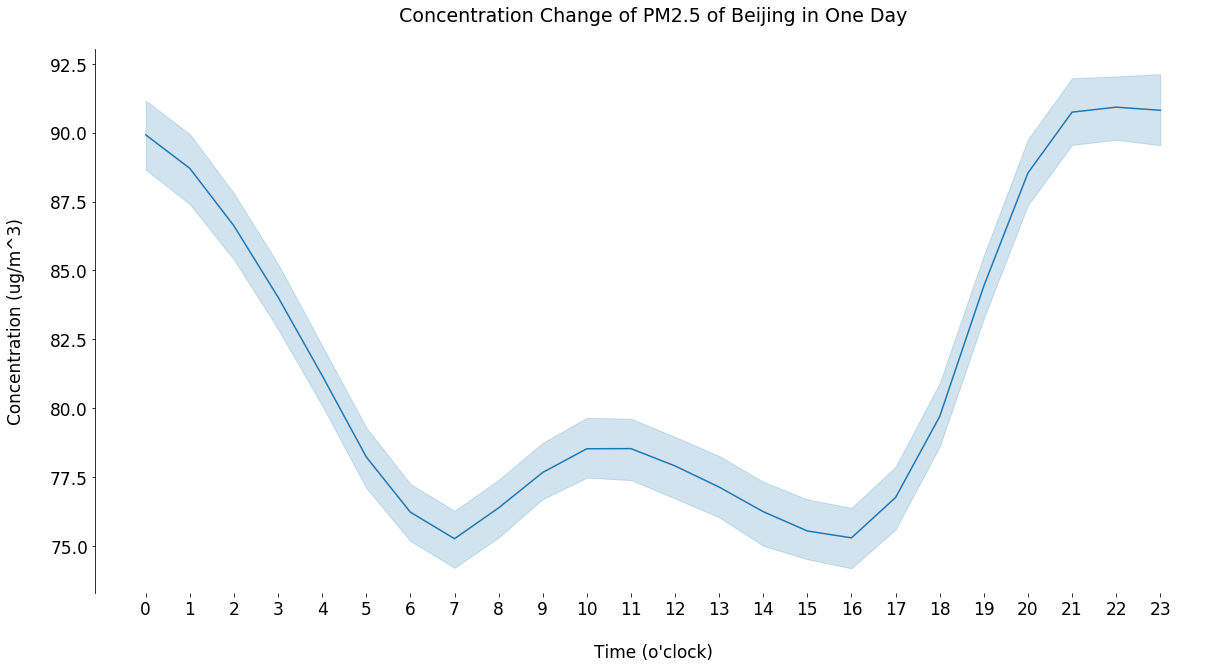

In [56]:
plt.figure(figsize = (20, 10))

fg = sns.lineplot(x="Time Number", y="PM2.5 concentration (ug/m^3)", data = bj_weather_cleaned);
fg.set_xticks(np.arange(0, 24))

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("Concentration Change of PM2.5 of Beijing in One Day\n", size = 19)

plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)

plt.xlabel("\nTime (o'clock)", fontsize = 17)
plt.ylabel("Concentration (ug/m^3)\n", fontsize = 17)


plt.show()

fg.figure.savefig('pm25_day.png')

## Question2: How does the concentration of PM 2.5 change with temperature?

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


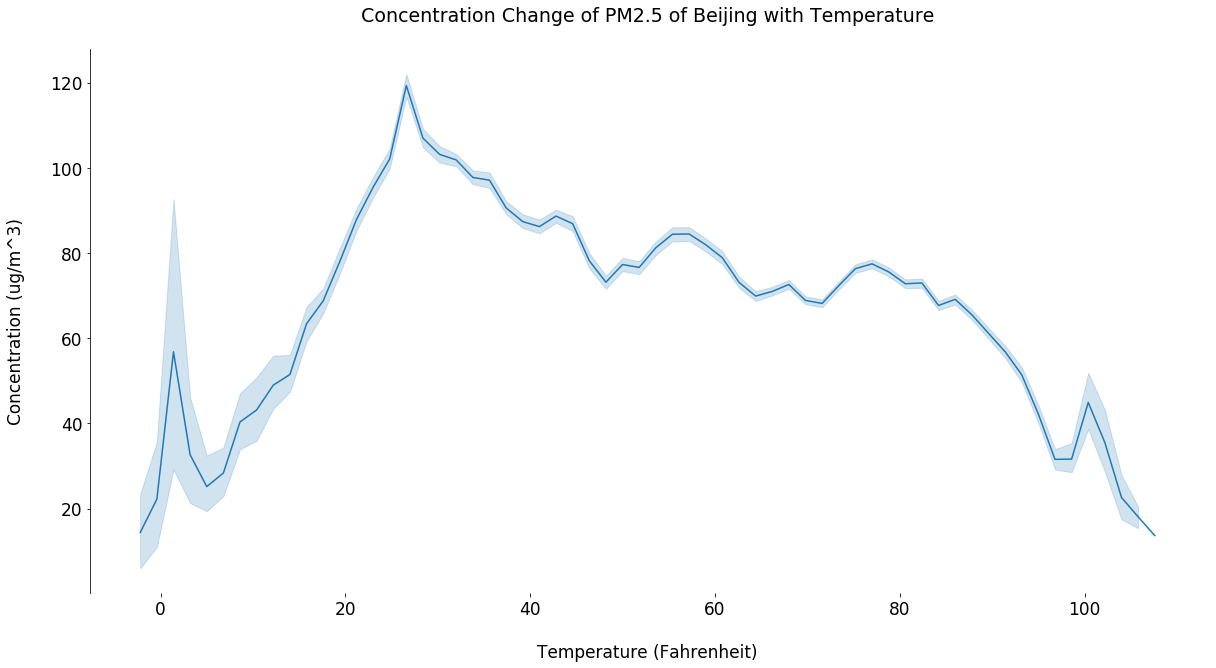

In [60]:
plt.figure(figsize = (20, 10))

fg = sns.lineplot(x="Temperature (Fahrenheit)", y="PM2.5 concentration (ug/m^3)", data = bj_weather_cleaned);
# fg.set_xticks()

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("Concentration Change of PM2.5 of Beijing with Temperature\n", size = 19)

plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)

plt.xlabel("\nTemperature (Fahrenheit)", fontsize = 17)
plt.ylabel("Concentration (ug/m^3)\n", fontsize = 17)

plt.show()

fg.figure.savefig('pm25_temperature.png')

## Question3: How does the concentration of PM 2.5 change with wind speed?

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


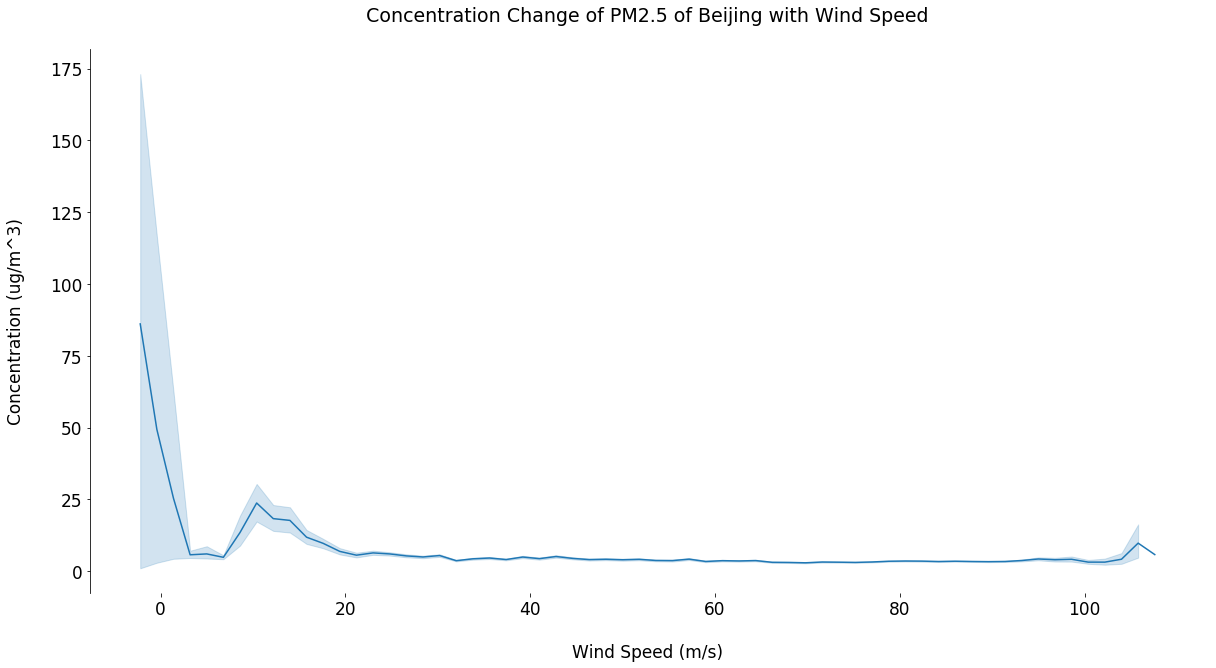

In [61]:
plt.figure(figsize = (20, 10))

fg = sns.lineplot(x="Temperature (Fahrenheit)", y="Wind Speed (m/s)", data = bj_weather_cleaned);
# fg.set_xticks()

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("Concentration Change of PM2.5 of Beijing with Wind Speed\n", size = 19)

plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)

plt.xlabel("\nWind Speed (m/s)", fontsize = 17)
plt.ylabel("Concentration (ug/m^3)\n", fontsize = 17)

plt.show()

fg.figure.savefig('pm25_windspeed.png')